In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
pd.set_option('mode.chained_assignment', None)
import geopandas as gpd

AttributeError: partially initialized module 'fiona' has no attribute '_loading' (most likely due to a circular import)

In [4]:
df = pd.read_csv("D:/UGP/datasets/sla.csv")
s1 = df['indian_ocean']
s2 = df['arabian_sea']
s3 = df['bay_of_bengal']

In [5]:
df = pd.read_csv("/UGP/datasets/precip.csv")
df = df.iloc[:-3]
r1_precip = df['r1']
r2_precip = df['r2']
r3_precip = df['r3']
r4_precip = df['r4']

time = pd.DatetimeIndex(df['time']).unique()

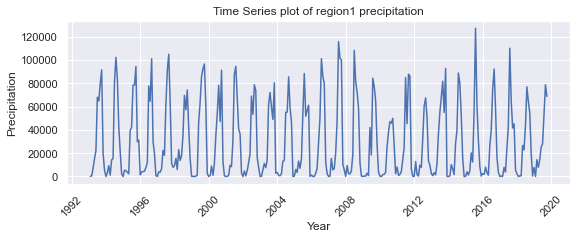

In [24]:
fig,ax = plt.subplots(figsize=(9,3))

plt.plot(time,r1_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region1 precipitation')
plt.show()

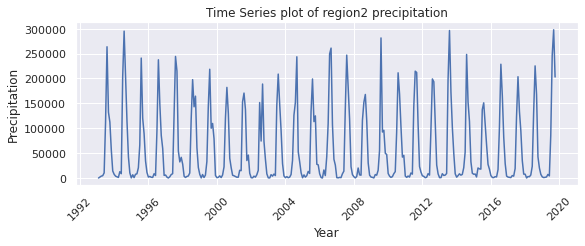

In [7]:
fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,r2_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region2 precipitation')
plt.show()

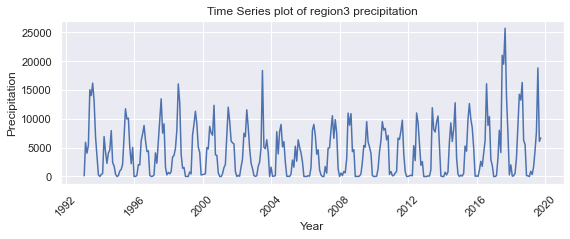

In [25]:
fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,r3_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region3 precipitation')
plt.show()

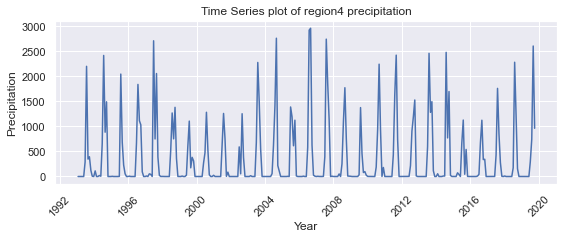

In [26]:
fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,r4_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region4 precipitation')
plt.show()

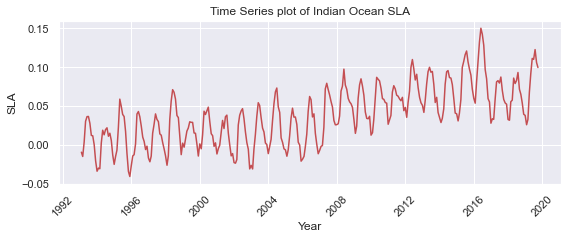

In [27]:
fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,s1, 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('SLA')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of Indian Ocean SLA')
plt.show()

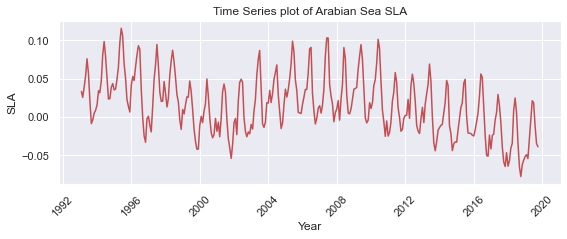

In [28]:
fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,s2, 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('SLA')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of Arabian Sea SLA')
plt.show()

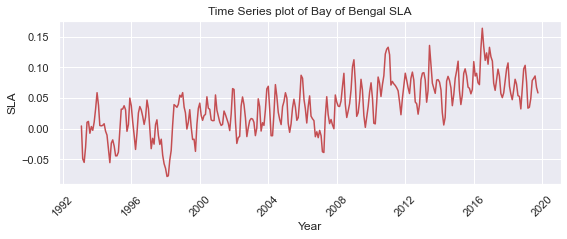

In [29]:
fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,s3, 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('SLA')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of Bay of Bengal SLA')
plt.show()

In [30]:
# ONI ENSO INDEX

col = np.arange(13)
data = pd.DataFrame(np.loadtxt("/UGP/datasets/oni.txt"),columns=col).set_index(0).stack()
data = pd.DataFrame(data).rename(columns = {0:"oni"})
data = data.reset_index().rename(columns = {0:"year","level_1":"month"})
data = data[(data["year"] > 1992) & (data["year"] <= 2019)]
data = data[:-3]


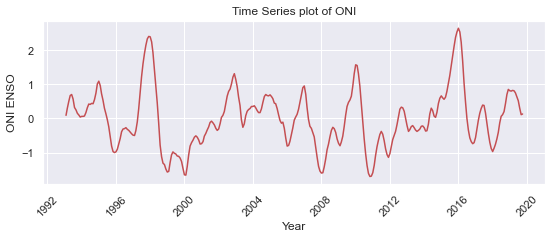

In [31]:
fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,data['oni'], 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('ONI ENSO')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of ONI')
plt.show()

In [33]:
import random
from dateutil.parser import parse
from scipy import signal
from scipy.interpolate import interp1d
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.var_model import VAR

In [34]:
df = pd.DataFrame({"precip_SE":np.array(r1_precip),
                   "precip_SW":np.array(r2_precip),
                   "precip_NE":np.array(r3_precip),
                   "precip_NW":np.array(r4_precip),
                   "sla_io":np.array(s1),
                   "sla_as":np.array(s2),
                   "sla_bb":np.array(s3),
                   "enso":np.array(data['oni'])})

In [35]:
df.set_index(time,inplace=True)

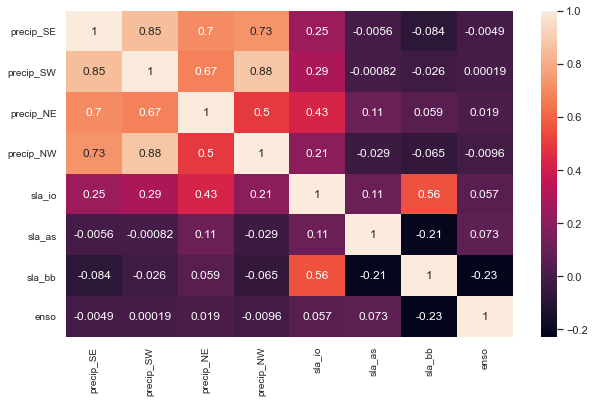

In [36]:
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,annot = True,annot_kws={'size':12})
heatmap = plt.gcf()
heatmap.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

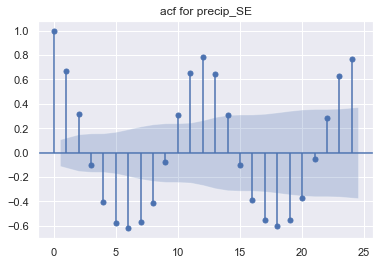

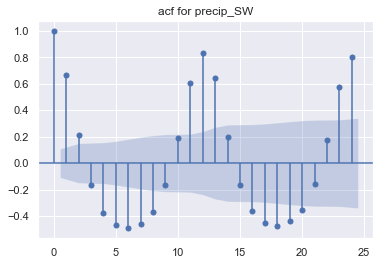

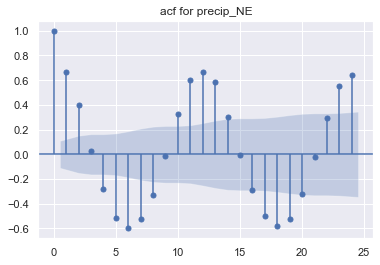

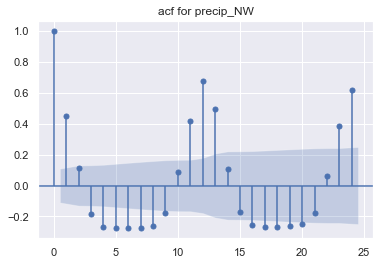

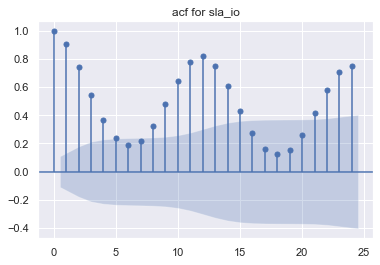

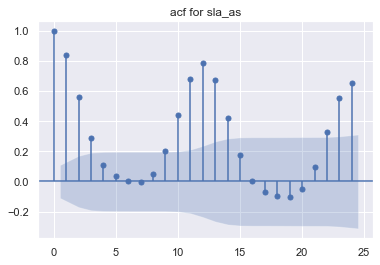

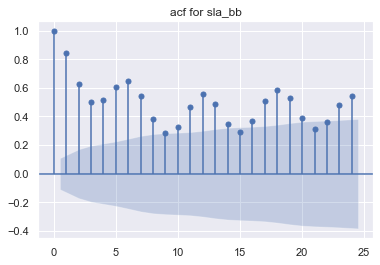

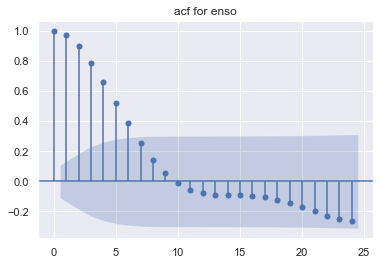

In [37]:
for i in df:
    plot_acf(df[i],lags=24)
    plt.title("acf for "+i )
    plt.show()

In [38]:
n_obs=12
X_train, X_test = df[0:-n_obs], df[-n_obs:]
print(X_train.shape, X_test.shape)
X_train.head()

(309, 8) (12, 8)


,precip_SE,precip_SW,precip_NE,precip_NW,sla_io,sla_as,sla_bb,enso
time,,,,,,,,
1993-01-31,163.73653,1.633409,118.10749,0.0,-0.009416,0.033238,0.004194,0.09
1993-02-28,528.27760,1931.315300,5931.45560,0.0,-0.014918,0.025465,-0.049455,0.30
1993-03-31,7129.06740,3857.536900,4042.73120,0.0,0.003760,0.038802,-0.055315,0.50
1993-04-30,15135.64800,4580.593800,5394.87000,0.0,0.030399,0.053378,-0.030601,0.67
1993-05-31,22333.06000,10356.710000,15049.10700,0.0,0.036380,0.075841,0.010317,0.70


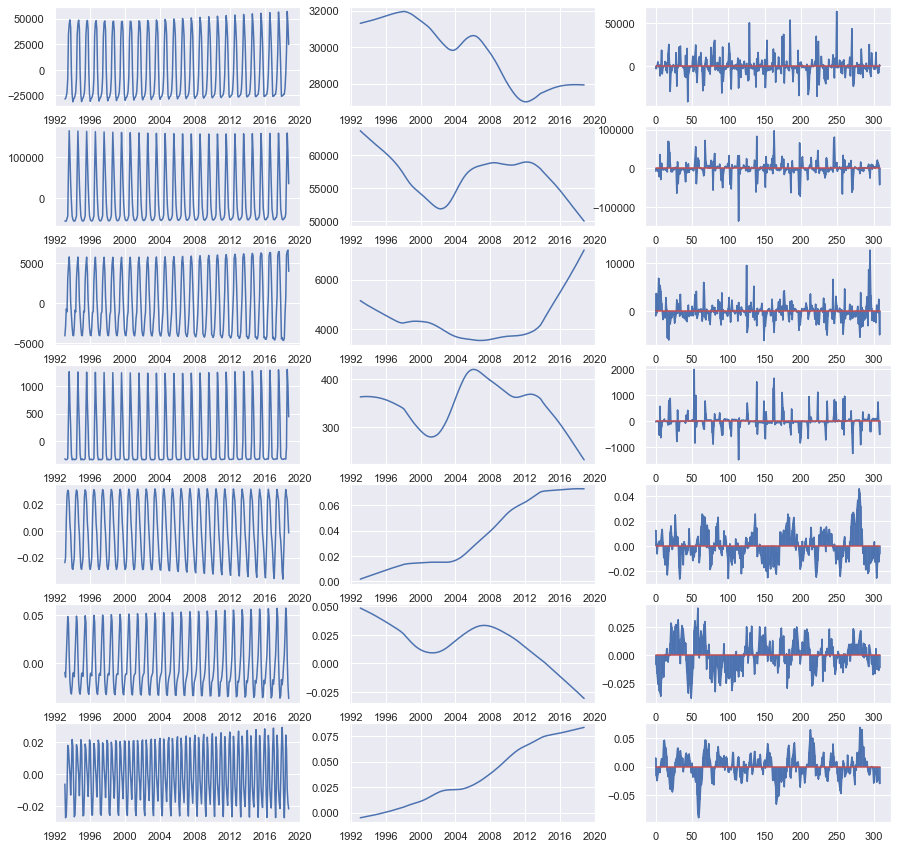

<Figure size 1008x432 with 0 Axes>

In [39]:
from statsmodels.tsa.seasonal import STL
fig, ax = plt.subplots(7,3,figsize=(15, 15))
plt.figure(figsize=(14,6))
transform_data = pd.DataFrame()
for i in range(7): 
    stl = STL(X_train.iloc[:,i], period = 12,seasonal=61 , trend = 121)
    res = stl.fit()
    transform_data[X_train.columns[i]] = res.resid
    ax[i,0].plot(res.seasonal)
    ax[i,1].plot(res.trend)
    ax[i,2].stem(res.resid , markerfmt='')
transform_data[X_train.columns[7]] = X_train.iloc[:,7] 

In [40]:
transform_data.describe()

,precip_SE,precip_SW,precip_NE,precip_NW,sla_io,sla_as,sla_bb,enso
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,10.283570,40.475820,-61.812684,1.913810,0.000182,0.000247,-0.000011,-0.027152
std,13189.499592,23292.981425,2281.248625,359.214033,0.012866,0.015101,0.024429,0.866132
min,-41331.242007,-136520.788551,-6077.533967,-1488.807445,-0.026158,-0.038163,-0.090108,-1.700000
25%,-5203.195884,-6394.457160,-1235.598449,-67.212843,-0.008869,-0.010535,-0.013921,-0.590000
50%,-1269.604295,-991.342937,-225.465952,-16.100521,-0.000953,0.000144,-0.000008,-0.120000
75%,3813.413962,5657.202618,628.064377,48.865745,0.008164,0.010661,0.015887,0.440000
max,63997.537227,97256.221927,12766.814363,1980.674024,0.046190,0.042123,0.068960,2.640000


In [41]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
print('Augmented Dickey-Fuller Test: Precipitation SE Time Series')
augmented_dickey_fuller_statistics(transform_data['precip_SE'])
print('Augmented Dickey-Fuller Test: Precipitation NW Time Series')
augmented_dickey_fuller_statistics(transform_data['precip_NW'])
print('Augmented Dickey-Fuller Test: Precipitation SW Time Series')
augmented_dickey_fuller_statistics(transform_data['precip_SW'])
print('Augmented Dickey-Fuller Test: Precipitation NE Time Series')
augmented_dickey_fuller_statistics(transform_data['precip_NE'])
print('Augmented Dickey-Fuller Test: SLA Indian Ocean Time Series')
augmented_dickey_fuller_statistics(transform_data['sla_io'])
print('Augmented Dickey-Fuller Test: SLA Bay of bengal Time Series')
augmented_dickey_fuller_statistics(transform_data['sla_bb'])
print('Augmented Dickey-Fuller Test: SLA Arabian sea Time Series')
augmented_dickey_fuller_statistics(transform_data['sla_as'])
print('Augmented Dickey-Fuller Test: ENSO Time Series')
augmented_dickey_fuller_statistics(transform_data['enso'])

Augmented Dickey-Fuller Test: Precipitation SE Time Series
ADF Statistic: -18.062846
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation NW Time Series
ADF Statistic: -17.789014
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation SW Time Series
ADF Statistic: -18.086765
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation NE Time Series
ADF Statistic: -9.636890
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Indian Ocean Time Series
ADF Statistic: -5.536083
p-value: 0.000002
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Bay of bengal Time Series
ADF Statistic: -6.178942
p-value: 0.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Arabian sea Time Series
AD

In [42]:
print('Augmented Dickey-Fuller Test: Precipitation SE Time Series')
augmented_dickey_fuller_statistics(X_train['precip_SE'])
print('Augmented Dickey-Fuller Test: Precipitation NW Time Series')
augmented_dickey_fuller_statistics(X_train['precip_NW'])
print('Augmented Dickey-Fuller Test: Precipitation SW Time Series')
augmented_dickey_fuller_statistics(X_train['precip_SW'])
print('Augmented Dickey-Fuller Test: Precipitation NE Time Series')
augmented_dickey_fuller_statistics(X_train['precip_NE'])
print('Augmented Dickey-Fuller Test: SLA Indian Ocean Time Series')
augmented_dickey_fuller_statistics(X_train['sla_io'])
print('Augmented Dickey-Fuller Test: SLA Bay of bengal Time Series')
augmented_dickey_fuller_statistics(X_train['sla_bb'])
print('Augmented Dickey-Fuller Test: SLA Arabian sea Time Series')
augmented_dickey_fuller_statistics(X_train['sla_as'])
print('Augmented Dickey-Fuller Test: ENSO Time Series')
augmented_dickey_fuller_statistics(X_train['enso'])

Augmented Dickey-Fuller Test: Precipitation SE Time Series
ADF Statistic: -3.945736
p-value: 0.001723
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation NW Time Series
ADF Statistic: -2.900823
p-value: 0.045252
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation SW Time Series
ADF Statistic: -3.314351
p-value: 0.014249
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation NE Time Series
ADF Statistic: -4.053421
p-value: 0.001155
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Indian Ocean Time Series
ADF Statistic: -1.707792
p-value: 0.427102
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Bay of bengal Time Series
ADF Statistic: -1.609580
p-value: 0.478780
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Arabian sea Time Series
ADF S

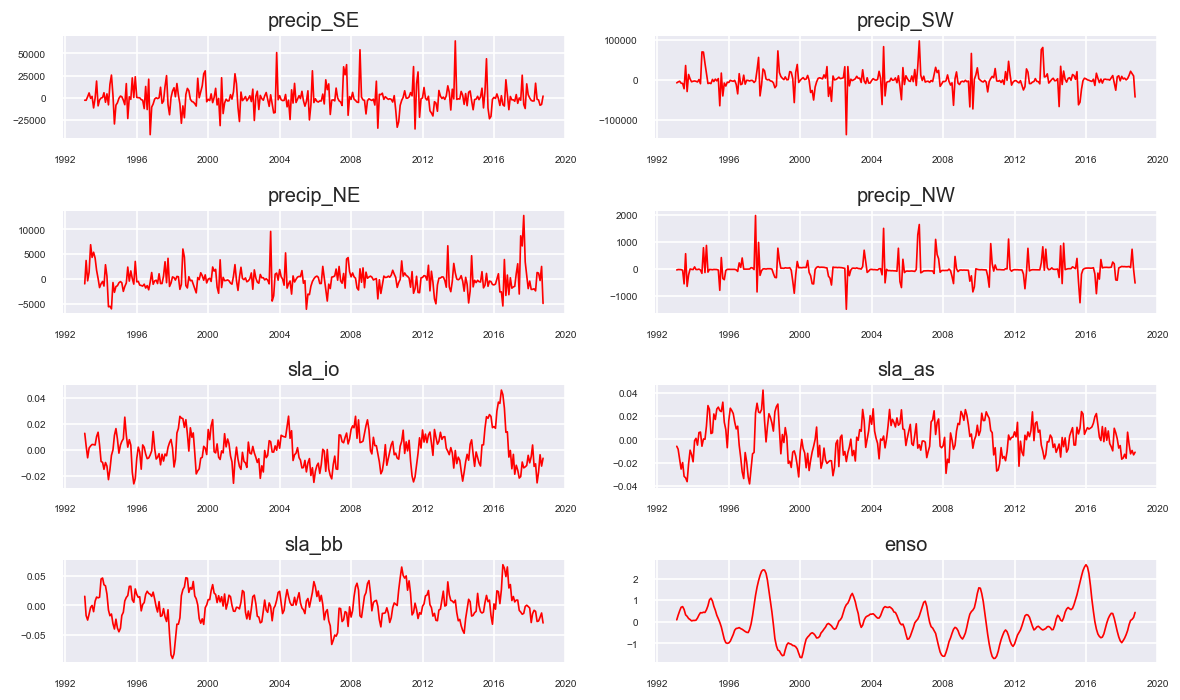

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    d = transform_data[transform_data.columns[i]]
    ax.plot(d, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [44]:
maxlag=12
test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset
grangers_causality_matrix(transform_data, variables = transform_data.columns)

,precip_SE_x,precip_SW_x,precip_NE_x,precip_NW_x,sla_io_x,sla_as_x,sla_bb_x,enso_x
precip_SE_y,1.0000,0.0100,0.0291,0.0281,0.0143,0.4679,0.2629,0.0503
precip_SW_y,0.0037,1.0000,0.4069,0.3944,0.0173,0.1617,0.6092,0.5584
precip_NE_y,0.4056,0.4117,1.0000,0.3488,0.6151,0.2071,0.0954,0.0390
precip_NW_y,0.0214,0.2567,0.6058,1.0000,0.0190,0.2213,0.1127,0.4773
sla_io_y,0.1585,0.0216,0.0989,0.1013,1.0000,0.0009,0.0003,0.0014
sla_as_y,0.0510,0.0036,0.1595,0.0803,0.0216,1.0000,0.0007,0.0002
sla_bb_y,0.0613,0.1049,0.0376,0.0154,0.0024,0.0000,1.0000,0.0000
enso_y,0.2096,0.5387,0.0804,0.4019,0.0159,0.0009,0.0307,1.0000


In [45]:
from sklearn.feature_selection import mutual_info_regression
mi = pd.DataFrame(columns=['sla_io' , 'sla_as' ,'sla_bb' , 'enso'])
mi = mi.append(pd.DataFrame(mutual_info_regression(df.iloc[:,4:], df.iloc[:,0] , discrete_features=False).reshape(1,-1), columns=list(mi)), ignore_index=True)
mi = mi.append(pd.DataFrame(mutual_info_regression(df.iloc[:,4:], df.iloc[:,1] , discrete_features=False).reshape(1,-1), columns=list(mi)), ignore_index=True)
mi = mi.append(pd.DataFrame(mutual_info_regression(df.iloc[:,4:], df.iloc[:,2] , discrete_features=False).reshape(1,-1), columns=list(mi)), ignore_index=True)
mi = mi.append(pd.DataFrame(mutual_info_regression(df.iloc[:,4:], df.iloc[:,3] , discrete_features=False).reshape(1,-1), columns=list(mi)), ignore_index=True)
mi['region'] = pd.Series(['precip_SE' , 'precip_SW' , 'precip_NE' , 'precip_NW'])
mi.set_index("region")

,sla_io,sla_as,sla_bb,enso
region,,,,
precip_SE,0.087939,0.014894,0.050300,0.042223
precip_SW,0.135551,0.000000,0.022497,0.000000
precip_NE,0.103544,0.061648,0.033593,0.065994
precip_NW,0.072948,0.002397,0.022232,0.000000
